<a href="https://colab.research.google.com/github/a22106/ImageClassification/blob/main/DeeplearningPyTorch/MoorsLaw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caveat
* notmalize data (범위 줄임)
* e.g. convert samples to mean 0, variance 1

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget -nc !wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2022-07-02 11:49:44--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2022-07-02 11:49:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-02 11:49:44 (48.9 MB/s) - ‘moore.csv’ saved [2302/2302]

FINISHED --2022-07-02 11:49:44--
Total wall clock time: 0.2s
Downloaded: 1 files, 2.2K in 0s (48.9 MB/s)


In [ ]:
# Load in the data
#reshape
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1) # 2차원 형태의 배열로 변경. N x D, D = 1
Y = data[:, 1].reshape(-1, 1)

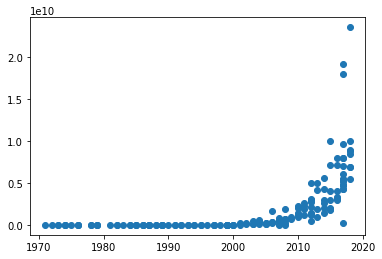

In [ ]:
# 지수 형태 데이터
plt.scatter(X, Y)

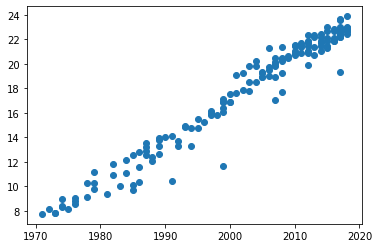

In [ ]:
# linear model을 만들기 위해 지수 형태의 데이터를 log로 변환
Y = np.log(Y)
plt.scatter(X, Y)

In [ ]:
# Scale
mx = X.mean()
sx = X.std() # 표준편차
my = Y.mean()
sy = Y.std()

# z-score 정규화(normalization)
X = (X - mx)/sx
Y = (Y - my)/sy

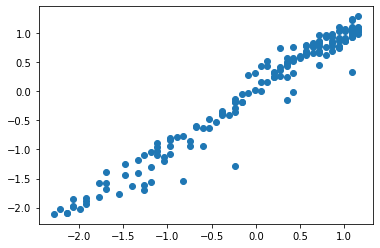

In [ ]:
# everything is centered and in a small range
plt.scatter(X, Y)

In [ ]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Linear regression model 생성
model = nn.Linear(1, 1)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'epoches: {it+1}/{n_epochs}, loss: {loss.item():.4f}')

epoches: 1/100, loss: 0.0698
epoches: 2/100, loss: 0.0585
epoches: 3/100, loss: 0.0513
epoches: 4/100, loss: 0.0467
epoches: 5/100, loss: 0.0437
epoches: 6/100, loss: 0.0418
epoches: 7/100, loss: 0.0406
epoches: 8/100, loss: 0.0399
epoches: 9/100, loss: 0.0394
epoches: 10/100, loss: 0.0390
epoches: 11/100, loss: 0.0388
epoches: 12/100, loss: 0.0387
epoches: 13/100, loss: 0.0386
epoches: 14/100, loss: 0.0386
epoches: 15/100, loss: 0.0385
epoches: 16/100, loss: 0.0385
epoches: 17/100, loss: 0.0385
epoches: 18/100, loss: 0.0385
epoches: 19/100, loss: 0.0385
epoches: 20/100, loss: 0.0385
epoches: 21/100, loss: 0.0385
epoches: 22/100, loss: 0.0385
epoches: 23/100, loss: 0.0385
epoches: 24/100, loss: 0.0385
epoches: 25/100, loss: 0.0385
epoches: 26/100, loss: 0.0385
epoches: 27/100, loss: 0.0385
epoches: 28/100, loss: 0.0385
epoches: 29/100, loss: 0.0385
epoches: 30/100, loss: 0.0385
epoches: 31/100, loss: 0.0385
epoches: 32/100, loss: 0.0385
epoches: 33/100, loss: 0.0385
epoches: 34/100, lo

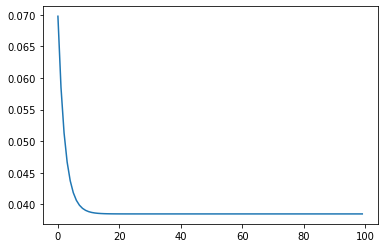

In [ ]:
plt.plot(losses)

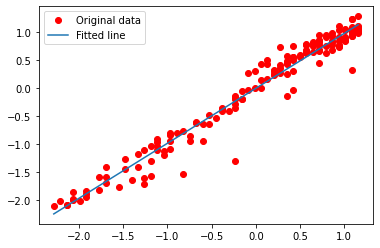

In [ ]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
print(w)

[[0.980571]]


# Transforming back to original scale
The original hypothesis is that the growth is exponential.
$$C = C_0r^t$$

$$\log{C} =\log{C_0}+\log{r*t} $$

$$y' = wx' + b$$

$$\frac{y-m_y}{s_y}=w\frac{x-m_x}{s_x}+b$$

$$y = w\frac{s_y}{s_x}x-w\frac{s_y}{s_x}m_x+bs_y+m_y=ax+\log{C_0}$$

$$a = w\frac{s_y}{s_x}$$

In [ ]:
a = w[0,0]*sy/sx
print(a)

0.3416824347306627


# Exponential Growth Model
The original model for exponential growth:
$$C = C_0r^t$$
C: transistor
t: year

$$\log{C} =\log{C_0}+\log{r*t} $$

$$y' = wx' + b$$

$$\frac{y-m_y}{s_y}=w\frac{x-m_x}{s_x}+b$$

$$y = w\frac{s_y}{s_x}x-w\frac{s_y}{s_x}m_x+bs_y+m_y=ax+\log{C_0}$$

$$a = w\frac{s_y}{s_x}$$

In [ ]:
()